In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import glob

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
# %matplotlib inline
%matplotlib notebook

In [10]:
z_data.as_matrix().shape

(25, 25)

In [19]:
x = np.array([5.05, 5.25, 5.91, 6.54, 7.11, 7.68, 8.26, 8.85, 9.44, 10.01, 10.62, 11.17, 11.75, 12.32, 12.89, 13.46, 14.05, 14.66, 15.28, 15.87, 16.52, 17.12, 17.75, 18.38, 19.04, 19.61, 20.33, 20.94, 21.60, 22.23, 22.91, 23.50, 24.12, 24.77, 25.43, 26.02, 26.68, 27.29, 27.95, 28.58, 29.22, 29.87, 30.53, 31.21, 31.86, 32.39, 32.97, 33.54, 34.09, 34.60, 35.03])
y = [-7.82, -7.78, -7.41, -7.04, -6.63, -6.14, -5.57, -4.96, -4.43, -3.94, -3.41, -2.88, -2.27, -1.70, -1.09, -0.52, -0.07, 0.41, 0.82, 1.23, 1.60, 1.85, 2.10, 2.31, 2.40, 2.56, 2.53, 2.58, 2.55, 2.52, 2.40, 2.25, 2.10, 1.90, 1.67, 1.48, 1.24, 0.97, 0.82, 0.58, 0.39, 0.24, 0.12, -0.03, -0.06, -0.05, -0.05, -0.08, -0.07, -0.07, -0.06]
x += 10

In [20]:
p = np.poly1d(np.polyfit(x, y, 5))
ynew = y - p(43.03356301)
p = np.poly1d(np.polyfit(x, ynew, 5))
d = np.polyder(p, m=1)

In [21]:
p(43.03356301)

4.4053649617126212e-13

In [38]:
def compute_theta(z):
    k_bin = 0.2
    memb_b = 15
    theta = 0.5*(np.tanh(k_bin*(z+memb_b))-np.tanh(k_bin*(z-memb_b)));
    return theta

In [26]:
np.tanh(0.5)

0.46211715726000974

In [29]:
d(14.33)

0.000499517284119122

<IPython.core.display.Javascript object>


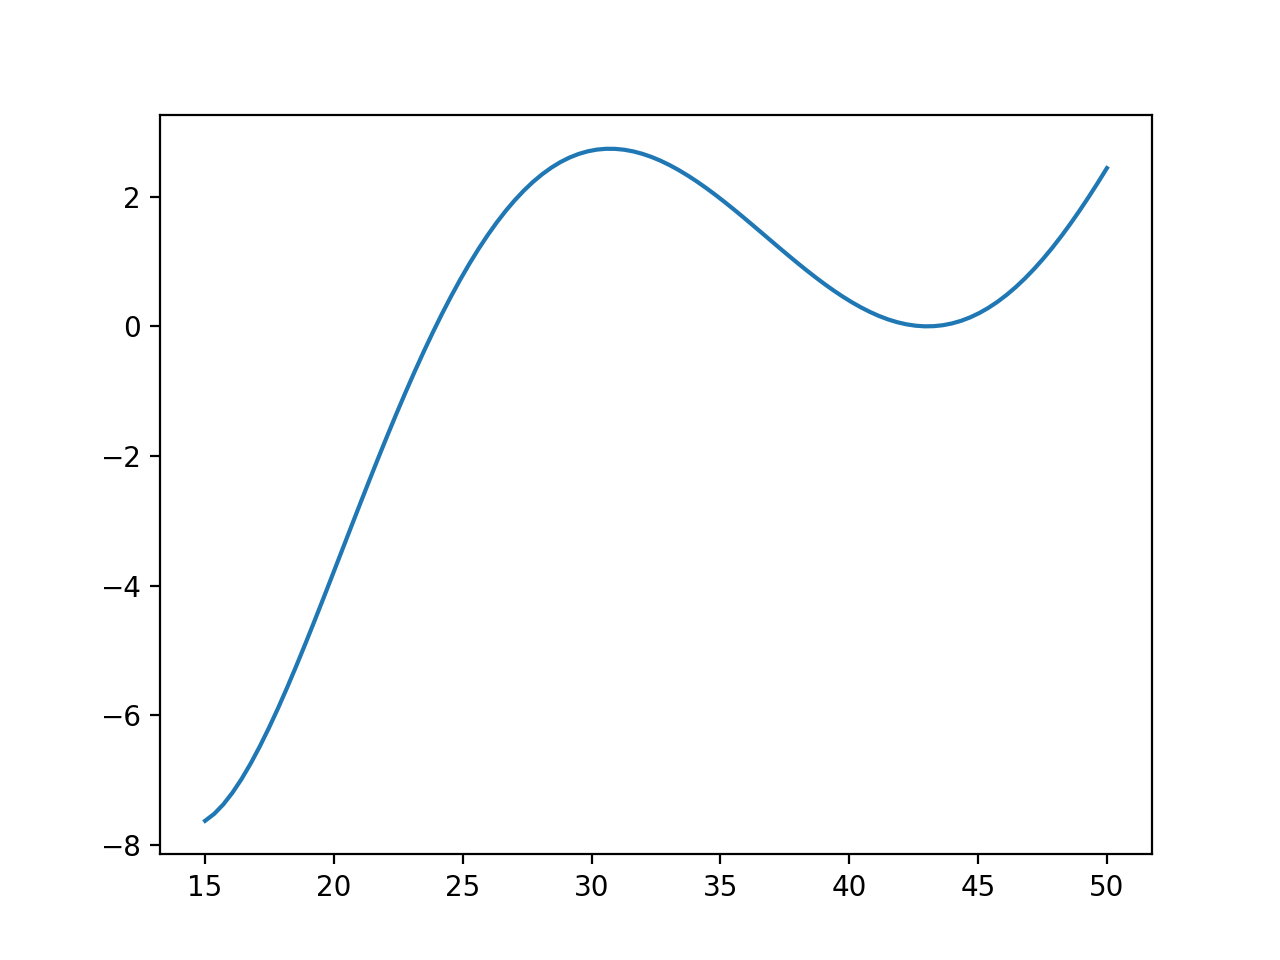

In [33]:
dis = np.linspace(15, 50, 100)
plt.plot(dis, p(dis))

<IPython.core.display.Javascript object>


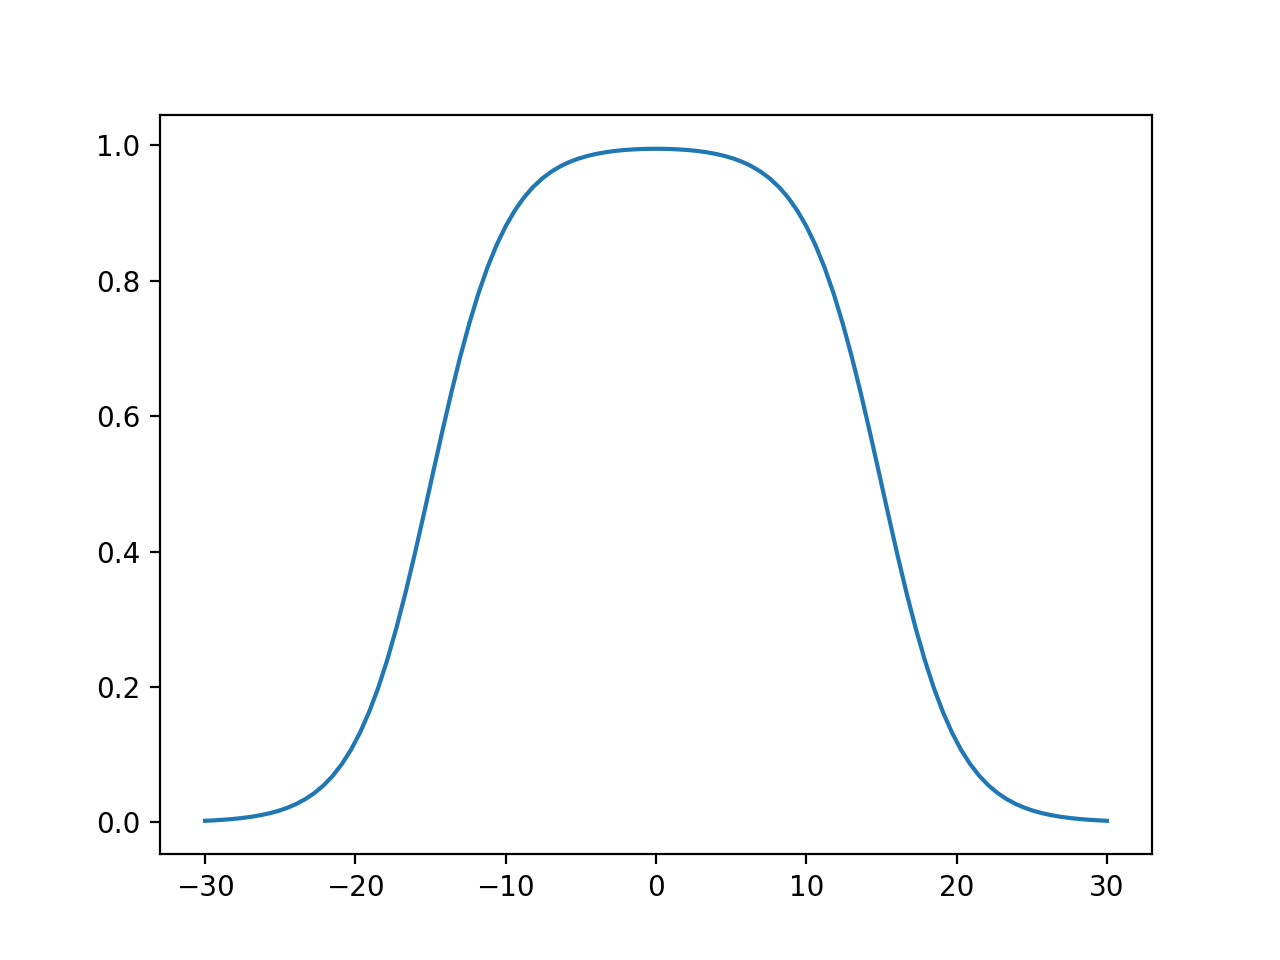

In [39]:
z = np.linspace(-30,30, 100)
plt.plot(z, compute_theta(z))

In [50]:
n = 100
xv, yv = np.meshgrid(dis, z, sparse=False, indexing='ij')
f = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f[i][j] = p(xv[i,j]) * compute_theta(yv[i,j])

In [73]:
p(15)

-7.6316250583217027

In [80]:
n = 100
f2 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f2[i][j] = (p(xv[i,j]) -p(15)) * compute_theta(yv[i,j])

In [81]:
data = [
    go.Surface(
        x=dis,
        y=z,
        z=f2.T
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    scene = dict(
        xaxis = dict(
            title='Dis'),
        yaxis = dict(
            title='Z'),
        zaxis = dict(
            title='f'),),
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

In [83]:
data = [
    go.Surface(
        x=dis,
        y=z,
        z=f.T
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    scene = dict(
        xaxis = dict(
            title='Dis'),
        yaxis = dict(
            title='Z'),
        zaxis = dict(
            title='f'),),
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2, filename='elevations-3d-surface')

In [66]:
trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[8, 7, 6, 5, 4, 3, 2, 1, 0]
)
trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 2, 3, 4, 5, 6, 7, 8]
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='AXIS TITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    yaxis=dict(
        title='AXIS sdfTITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-labels')

In [8]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())


def variable_test2(k_list=[1],
                      force_ramp_rate_list=[1],
                      memb_k_list=[1],
                      force_list=["ramp"],
                      rg_list=[0.08],
                      pressure_list=[0.1],
                      repeat=1,
                      mode_list=[2],
                      commons=0,
                      temperature_list=[300],
                      start_from_list=["native"],
                      simulation_model_list=["go"]):
    inputs = locals()
    tmp = {}
    for key,value in test.items():
        if isinstance(value, list):
            tmp[key] = value
    return inputs
#     all_inputs = expand_grid(inputs)
#     for myInput in all_inputs:
#         print(myInput)

In [9]:
start_from_list=["native"]
# start_from_list=["extended", "topology"]
mode_list = [3]  # lipid mediated interaction
# pressure_list = [0, 0.1, 1.0]
pressure_list = [0]
force_ramp_rate_list=[10]
temperature_list=[500]
memb_k_list = [3]
rg_list = [0.1]
force_list = [0.4, 0.5, 0.6, 0.7, 0.8]
repeat = 2
test = variable_test2(temperature_list=temperature_list,
                start_from_list=start_from_list,
                rg_list=rg_list,
                memb_k_list=memb_k_list,
                mode_list=mode_list,
                pressure_list=pressure_list,
                force_ramp_rate_list=force_ramp_rate_list,
                force_list=force_list,
                repeat=repeat,
                commons=1)

In [11]:
test

{'commons': 1,
 'force_list': [0.4, 0.5, 0.6, 0.7, 0.8],
 'force_ramp_rate_list': [10],
 'k_list': [1],
 'memb_k_list': [3],
 'mode_list': [3],
 'pressure_list': [0],
 'repeat': 2,
 'rg_list': [0.1],
 'simulation_model_list': ['go'],
 'start_from_list': ['native'],
 'temperature_list': [500]}

In [21]:
tmp = {}
for key,value in test.items():
    if isinstance(value, list):
        tmp[key] = value
print(tmp)

{'simulation_model_list': ['go'], 'start_from_list': ['native'], 'temperature_list': [500], 'mode_list': [3], 'pressure_list': [0], 'rg_list': [0.1], 'force_list': [0.4, 0.5, 0.6, 0.7, 0.8], 'memb_k_list': [3], 'force_ramp_rate_list': [10], 'k_list': [1]}


In [22]:
a = tmp['force_list']

In [24]:

len(a)

5

In [25]:
length(a)

NameError: name 'length' is not defined

In [27]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())
atest = expand_grid(tmp)

In [30]:
for index, row in atest.iterrows():
    print(row.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [33]:
a = atest.loc[0]

In [35]:
type(a)

pandas.core.series.Series

In [40]:
for t in a.index:
    exec(t.replace("_list", "")+"= '"+str(a[t]) + "'")

In [71]:
def move_data(data_folder, freeEnergy_folder, folder, kmem=0.2, klipid=0.1, kgo=0.1, krg=0.2):
    print("move data")
    os.system("mkdir -p "+freeEnergy_folder+folder+"/data")
    dis_list = glob.glob(data_folder+folder+"/dis*.feather")
    for dis_file in dis_list:
        dis = dis_file.split("/")[-1].replace('dis', '').replace('.feather', '')
        print(dis)
        t6 = pd.read_feather(dis_file)
        remove_columns = ['index']
        t6 = t6.drop(remove_columns, axis=1)
        t6 = t6.assign(TotalE_perturb_mem_p=t6.TotalE + kmem*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_mem_m=t6.TotalE - kmem*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_lipid_p=t6.TotalE + klipid*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_lipid_m=t6.TotalE - klipid*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_go_p=t6.TotalE + kgo*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_go_m=t6.TotalE - kgo*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_rg_p=t6.TotalE + krg*t6.Rg)
        t6 = t6.assign(TotalE_perturb_rg_m=t6.TotalE - krg*t6.Rg)
        dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
        temps = list(dic.values())
        return t6
#         def convert(x):
#             return dic[x]
#         t6["Temp"] = t6["Temp"].apply(convert)

#         for temp in temps:
#             if temp > 600:
#                 continue

#             tmp = t6.query('Temp=="{}"& Step > 1e7'.format(temp))
        
#             tmp.to_csv(freeEnergy_folder+folder+"/data/t_{}_dis_{}.dat".format(temp, dis), sep=' ', index=False, header=False)

In [72]:
pre = "/Users/weilu/Research/davinci/"
data_folder = pre + "all_data_folder/"
freeEnergy_folder = "all_freeEnergy_calculation_nov11/"
folder= "next_gen_native_based_memb_3_rg_0.2_lipid_0.6_extended"
test = move_data(data_folder, freeEnergy_folder, folder)

move data
93.0


In [73]:
test

,Step,Run,Temp,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE,TotalE_perturb_mem_p,TotalE_perturb_mem_m,TotalE_perturb_lipid_p,TotalE_perturb_lipid_m,TotalE_perturb_go_p,TotalE_perturb_go_m,TotalE_perturb_rg_p,TotalE_perturb_rg_m
0,4000,0,T0,0.053154,-340.903971,264.770226,0.019626,-329.668876,-116.221194,17.706541,-340.884345,-364.128584,-317.640106,-340.882383,-340.886308,-373.851233,-307.917458,-337.343037,-344.425653
1,4000,8,T8,0.046515,57.227135,260.807037,0.034982,-274.675029,-113.617067,15.378693,57.262117,34.538704,79.985530,57.265615,57.258619,29.794614,84.729620,60.337856,54.186378
2,4000,7,T7,0.049539,37.342474,267.336601,0.023508,-277.309994,-116.752051,14.960720,37.365982,14.015572,60.716392,37.368333,37.363631,9.634983,65.096981,40.358126,34.373838
3,4000,3,T3,0.050610,-106.198257,259.340862,0.044963,-300.457704,-112.133221,13.652946,-106.153294,-128.579938,-83.726650,-106.148798,-106.157790,-136.199064,-76.107524,-103.422705,-108.883883
4,4000,2,T2,0.050447,-143.899147,261.719254,0.023098,-313.320690,-114.004572,17.569649,-143.876049,-166.676963,-121.075135,-143.873739,-143.878359,-175.208118,-112.543980,-140.362119,-147.389979
5,4000,6,T6,0.051130,17.105416,259.207723,0.044985,-282.530731,-116.443658,15.529345,17.150402,-6.138330,40.439134,17.154900,17.145903,-11.102671,45.403475,20.256271,14.044533
6,4000,10,T10,0.042358,268.781909,264.608518,0.043568,-245.739014,-106.952647,20.418220,268.825477,247.434948,290.216007,268.829834,268.821120,244.251576,293.399378,272.909121,264.741833
7,4000,5,T5,0.047031,-35.042714,265.030808,0.033380,-286.830280,-116.276252,17.455571,-35.009334,-58.264584,-11.754083,-35.005996,-35.012672,-63.692362,-6.326306,-31.518220,-38.500448
8,4000,9,T9,0.044207,151.503322,259.758001,0.036434,-249.294309,-111.821678,17.890197,151.539756,129.175421,173.904092,151.543400,151.536113,126.610325,176.469187,155.117796,147.961717
9,4000,1,T1,0.053304,-268.844189,263.761207,0.035189,-327.267316,-107.646588,16.918779,-268.809000,-290.338318,-247.279683,-268.805482,-268.812519,-301.535732,-236.082269,-265.425245,-272.192756


In [39]:
a

simulation_model_list        go
start_from_list          native
temperature_list            500
mode_list                     3
pressure_list                 0
rg_list                     0.1
force_list                  0.4
memb_k_list                   3
force_ramp_rate_list         10
k_list                        1
Name: 0, dtype: object